<a href="https://colab.research.google.com/github/Djydo/data-science/blob/master/ml_multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-multilearn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import files

from sklearn.decomposition import PCA
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Mount Google drive 

In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Feature Engineering   
In the following cell, we perform feature engineering on raw data sample by transforming the categorical data  to numerical data.

Also, the 'age' column is dropped and substituted with its alternative 'agecode'.


In [0]:
# read data from googledrive file 'pysch_disease_dat.csv' into dataframe
path = "/content/drive/My Drive/pysch_disease_dat.csv"
df = pd.read_csv(path)

#select the features/labels to transform and apply corresponding transformation
labels = ['Insomnia', 'schizophrenia', 'vascula_demetia', 'MBD', 'Bipolar']
features = ['sex', 'faNoily_status', 'religion', 'occupation', 'genetic', \
           'status', 'loss_of_parent', 'divorce', 'Injury', 'Spiritual_consult']

label_transform = df[labels].apply(LabelEncoder().fit_transform)
feature_transform = df[features].apply(LabelEncoder().fit_transform)
df_transform = pd.concat([df['agecode'], feature_transform, label_transform], axis=1)
df_transform.to_csv('patient_data',header=False, index=False)



In [0]:
# a glimpse into transform data frame

# print("raw data (rows, columns): {}".format(df.shape))
# print("data frame size (rows, columns): {}\n".format(df_transform.shape))
# print(df_transform.dtypes)
# df_transform.describe()

# df_transform[df[features].dtypes.index.values].hist(figsize=[11,11])
# df_transform[df[labels].dtypes.index.values].hist(figsize=[11,11])


In [0]:
from sklearn.model_selection import train_test_split
raw_data = pd.read_csv('patient_data', header=None)
X, y = raw_data.loc[:,0:10], raw_data.loc[:,11:15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


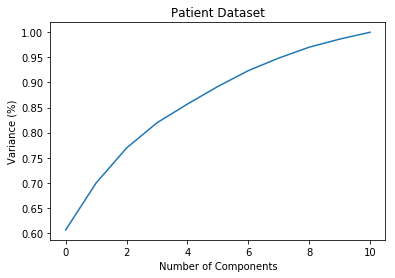

In [24]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Patient Dataset')
plt.show()

###  Binary Relevance using Logistic Regression classifier

In [6]:
classifier = BinaryRelevance(LogisticRegression(solver='liblinear'))
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))

predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)


0.375


0.32

In [7]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=11, random_state=1)
multi_target_forest = MultiOutputClassifier(forest)
f_classifier = multi_target_forest.fit(X_train, y_train)
print(f_classifier.score(X_train, y_train))

predictions = f_classifier.predict(X_test)
accuracy_score(y_test,predictions)


0.85


0.26

In [9]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

classifier = ClassifierChain(LogisticRegression(solver='liblinear'))  #0.28484848484848485
# classifier = ClassifierChain(forest) # 0.3151515151515151
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))

# predict
predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)

0.3725


0.35

In [10]:
from skmultilearn.problem_transform import LabelPowerset


classifier = LabelPowerset(LogisticRegression(solver='liblinear',multi_class='auto'))
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))

predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)

0.405


0.37

In [19]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import lil_matrix

X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

classifier = MLkNN(k=13)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))

predictions = classifier.predict(X_test)
accuracy_score(y_test,predictions)

0.435


0.27

## References   
1. Stack Overflow feature and label categorical transformation. [link](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn/34780935)
2. 